In [1]:
from collections import namedtuple
import pandas as pd
from typing import Tuple, Callable
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

import sys
import numpy as np

# RGB and xy named tuples

colour_point = namedtuple('colour_point', 'x y')


# Data Frame Spectral
df = pd.read_excel('Spect.xlsx', skiprows = 0,
                 names=['dark skin', 'light skin', 'blue sky', 'foliage',
                        'blue flower', 'bluish green', 'orange', 
                        'purplish blue','moderate red','purple',
                        'yellow green','orange yellow','blue','green','red',
                        'yellow','magenta','cyan','white 9.5 ','neutral 8',
                        'neutral 6.5','neutral 5','neutral 3.5','black 2'])


# CIE colour matching functions para longitud de onda  
# desde 380 hasta 780 nm, con saltos de 10nm


cie_colour_match = (
    (0.0014, 0.0000, 0.0065),  (0.0042, 0.0001, 0.0201),
    (0.0143, 0.0004, 0.0679), 
    (0.0435, 0.0012, 0.2074),  (0.1344, 0.0040, 0.6456),
     (0.2839, 0.0116, 1.3856), 
    (0.3483, 0.0230, 1.7471),  (0.3362, 0.0380, 1.7721),
     (0.2908, 0.0600, 1.6692), 
    (0.1954, 0.0910, 1.2876),  (0.0956, 0.1390, 0.8130),
     (0.0320, 0.2080, 0.4652), 
    (0.0049, 0.3230, 0.2720),  (0.0093, 0.5030, 0.1582),
     (0.0633, 0.7100, 0.0782), 
    (0.1655, 0.8620, 0.0422),  (0.2904, 0.9540, 0.0203),
    (0.4334, 0.9950, 0.0087), 
    (0.5945, 0.9950, 0.0039),  (0.7621, 0.9520, 0.0021),
    (0.9163, 0.8700, 0.0017), 
    (1.0263, 0.7570, 0.0011),  (1.0622, 0.6310, 0.0008),
     (1.0026, 0.5030, 0.0003), 
    (0.8544, 0.3810, 0.0002),  (0.6424, 0.2650, 0.0000),
     (0.4479, 0.1750, 0.0000), 
    (0.2835, 0.1070, 0.0000),  (0.1649, 0.0610, 0.0000),
     (0.0874, 0.0320, 0.0000), 
    (0.0468, 0.0170, 0.0000),  (0.0227, 0.0082, 0.0000),
     (0.0114, 0.0041, 0.0000), 
    (0.0058, 0.0021, 0.0000),  (0.0029, 0.0010, 0.0000),
     (0.0014, 0.0005, 0.0000), 
    (0.0007, 0.0002, 0.0000),  (0.0003, 0.0001, 0.0000),
     (0.0002, 0.0001, 0.0000), 
    (0.0001, 0.0000, 0.0000),  (0.0000, 0.0000, 0.0000)
)



# Retorna arreglo (x,y,1-x-y)

def xy_to_xyz(x,y):

    return np.array((x,y,1-x-y))


#Convierte de XYZ a RGB

def xyz_to_rgb(XYZ):
    def gamma_RGB(x):
        if x > 0:
            v = x
        else:
            v = -x 
        if v < 0.018:
            gamma = (1.055*pow(v, 1.0/2.4)-0.055)/0.018
        else:
            gamma = (1.055*pow(v, 1.0/2.4)-0.055) 
            
        return gamma
        if gamma > 0: return gamma
        else: return gamma
        
        
    r,g,b = 0,0,0
    
#  RGB Working Space(BestRGB) and Reference White(D50)->  

    r = 1.7552599*XYZ[0] - 0.4836786*XYZ[1] - 0.2530000*XYZ[2]
    g = -0.5441336*XYZ[0] + 1.5068789*XYZ[1] + 0.0215528*XYZ[2]
    b = 0.0063467*XYZ[0] - 0.0175761*XYZ[1] + 1.2256959*XYZ[2]
    

#  RGB Working Space(sRGB) and Reference White(D65)

    #r = 3.2404542*XYZ[0] - 1.5371385*XYZ[1] - 0.4985314*XYZ[2]
    #g = -0.9692660*XYZ[0] + 1.8760108*XYZ[1] + 0.0415560*XYZ[2]
    #b = 0.0556434*XYZ[0] - 0.2040259*XYZ[1] + 1.0572252*XYZ[2]
    
    #r = gamma_RGB(r)
    #g = gamma_RGB(g)
    #b = gamma_RGB(b)
      
    
    return r,g,b



def spect_to_xy(ioo) -> colour_point: 
         
    Array_Spect = np.asarray( df)
        
    i=sp=xyz=x = y = z = 0.0
    
    # Computing XYZ From Spectral Data "Array_Spect" 
    
    for i in range(0,36,1):
        
        sp =  Array_Spect[i][ioo]  
        x += sp * cie_colour_match[i][0]
        y += sp * cie_colour_match[i][1]
        z += sp * cie_colour_match[i][2]
    xyz = x + y + z 
    
    return colour_point(x/xyz , y/xyz )

   x      y      z            R           G          B
------ ------ ------        --------   -------    -------
0.4222 0.3613 0.2165        130.4441    81.4526    66.7178 
0.4078 0.3581 0.2341        123.2802    82.2950    72.2123 
0.2645 0.2706 0.4649        55.0275    69.8240    144.5234 
0.3614 0.4304 0.2082        95.2596    116.3776    63.7182 
0.2883 0.2602 0.4515        67.8098    62.4747    140.4136 
0.2775 0.3647 0.3578        56.1417    103.5986    110.6469 
0.5248 0.4014 0.0739        180.6123    81.8220    22.1344 
0.2245 0.1904 0.5851        39.2609    45.2204    182.3842 
0.4863 0.3156 0.1982        165.9425    54.8801    61.3057 
0.3126 0.2259 0.4615        82.2848    45.9736    143.7249 
0.3958 0.4900 0.1141        109.3693    134.0000    34.1174 
0.4930 0.4352 0.0718        162.3392    99.2268    21.2910 
0.1983 0.1477 0.6540        28.3255    32.8460    204.0758 
0.3219 0.4881 0.1900        71.6309    143.9332    57.7096 
0.5638 0.3203 0.1159        205.3739    45.46

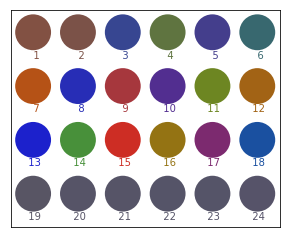

,dark skin,light skin,blue sky,foliage,blue flower,bluish green,orange,purplish blue,moderate red,purple,...,red,yellow,magenta,cyan,white 9.5,neutral 8,neutral 6.5,neutral 5,neutral 3.5,black 2
0,0.054928,0.121190,0.140803,0.050885,0.158202,0.145329,0.053094,0.131629,0.098325,0.095340,...,0.048997,0.055893,0.154660,0.113870,0.198909,0.182197,0.151760,0.108667,0.068051,0.031118
1,0.058196,0.148141,0.184342,0.053654,0.208656,0.185461,0.052865,0.171464,0.116366,0.118847,...,0.048123,0.052558,0.202328,0.144635,0.259195,0.240142,0.196731,0.133327,0.076379,0.031818
2,0.060952,0.180052,0.253856,0.055276,0.300129,0.249941,0.052598,0.232881,0.131251,0.148021,...,0.046975,0.051514,0.284373,0.192188,0.420628,0.367207,0.271888,0.163127,0.082990,0.032134
3,0.062206,0.196914,0.306988,0.056408,0.379623,0.299415,0.053118,0.289817,0.135560,0.172260,...,0.046706,0.051585,0.345673,0.234629,0.659732,0.506212,0.329589,0.180763,0.086445,0.032363
4,0.062053,0.201313,0.324564,0.057415,0.412229,0.323054,0.053421,0.329289,0.134019,0.182266,...,0.046643,0.052325,0.361699,0.259178,0.811365,0.566116,0.349304,0.186802,0.088084,0.032572
5,0.061716,0.203969,0.331075,0.058832,0.424513,0.339699,0.053938,0.361718,0.132384,0.176078,...,0.046921,0.053849,0.354580,0.284157,0.863100,0.581326,0.355931,0.190631,0.089786,0.032659
6,0.061316,0.208183,0.334410,0.060468,0.429127,0.357762,0.054314,0.387262,0.131113,0.159757,...,0.046996,0.056014,0.333798,0.316040,0.877124,0.585635,0.359727,0.193816,0.091230,0.032684
7,0.060896,0.215898,0.333286,0.061553,0.428518,0.383281,0.054315,0.398599,0.128977,0.139153,...,0.046329,0.059183,0.305362,0.352066,0.883974,0.587448,0.361265,0.194835,0.091262,0.032463
8,0.060749,0.229349,0.326504,0.062486,0.421513,0.420233,0.054708,0.389629,0.125917,0.118443,...,0.045404,0.066276,0.275337,0.389556,0.889684,0.587955,0.360748,0.194216,0.090480,0.032243
9,0.060863,0.250034,0.314477,0.063456,0.405380,0.465667,0.055738,0.359234,0.121431,0.100126,...,0.044641,0.080727,0.246454,0.425720,0.893799,0.586715,0.358632,0.192839,0.089570,0.032177


In [2]:
    print('   x      y      z            R           G          B')
    print('------ ------ ------        --------   -------    -------')
fig, ax = plt.subplots()

for t in range(0, 24, 1):    # Color Macbeth ()
        xy = spect_to_xy(t)
        z = 1.0 - (xy.x + xy.y) # Print z 
        xyz1 = xy_to_xyz(xy.x,xy.y)
        
        RGB1 = xyz_to_rgb(xyz1)  # Transformation xyz a rgb              
        RGB2 = np.asarray(RGB1)  # Convierte RGB to Array
        
        
        RGB3 = RGB2*255  # Data Print
        print('%.4f %.4f %.4f        %.4f    %.4f    %.4f \n' % ( xy.x, xy.y, z,RGB3[0],RGB3[1],RGB3[2]), end='')
        
                
        x, y = t % 6, -(t // 6)
        circle = Circle(xy=(x, y*1.2), radius=0.4, fc=RGB1)
        ax.add_patch(circle)
        ax.annotate('{:4d} '.format(t+1), xy=(x, y*1.2-0.5), va='center',
                ha='center', color=RGB1)
        RGB1=RGB2=RGB3=0.0

ax.set_xlim(-0.5,5.5)
ax.set_ylim(-4.35, 0.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect("equal")
plt.show()

df

# Correguir Iluminant pra D65 
    